In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the paths to the images
left_image_path = r'C:\Users\Yashraj Deshmukh\Desktop\Panaroma-Stitching\Images\I3\3_3.jpg'
right_image_path = r'C:\Users\Yashraj Deshmukh\Desktop\Panaroma-Stitching\Images\I3\3_4.jpg'

# Load the images
left_image = cv2.imread(left_image_path)
right_image = cv2.imread(right_image_path)

## Identifying Correspondence

### Feature Extraction - SIFT

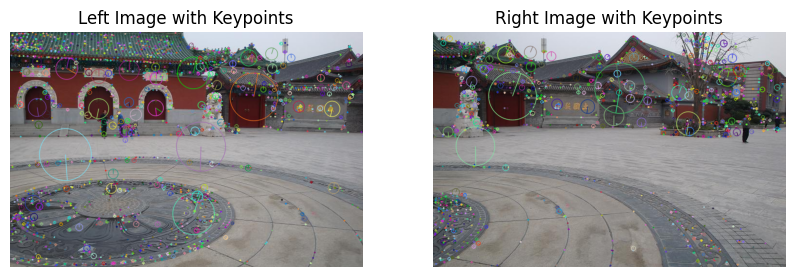

In [3]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT features and compute descriptors
keypoints_left, descriptors_left = sift.detectAndCompute(left_image, None)
keypoints_right, descriptors_right = sift.detectAndCompute(right_image, None)

# Draw keypoints on the images
left_image_with_keypoints = cv2.drawKeypoints(left_image, keypoints_left, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
right_image_with_keypoints = cv2.drawKeypoints(right_image, keypoints_right, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Left Image with Keypoints')
plt.imshow(cv2.cvtColor(left_image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Right Image with Keypoints')
plt.imshow(cv2.cvtColor(right_image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

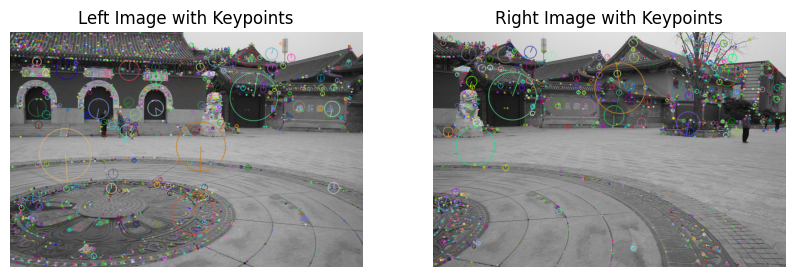

In [5]:
# Convert the images to grayscale
left_image_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_image_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift_gray = cv2.SIFT_create()

# Detect SIFT features and compute descriptors
keypoints_left_gray, descriptors_left_gray = sift_gray.detectAndCompute(left_image_gray, None)
keypoints_right_gray, descriptors_right_gray = sift_gray.detectAndCompute(right_image_gray, None)

# Draw keypoints on the images
left_image_with_keypoints_gray = cv2.drawKeypoints(left_image_gray, keypoints_left_gray, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
right_image_with_keypoints_gray = cv2.drawKeypoints(right_image_gray, keypoints_right_gray, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Left Image with Keypoints')
plt.imshow(cv2.cvtColor(left_image_with_keypoints_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Right Image with Keypoints')
plt.imshow(cv2.cvtColor(right_image_with_keypoints_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [8]:
type(keypoints_left_gray), type(keypoints_left_gray[0]), type(keypoints_left_gray[0].pt), type(keypoints_left_gray[0].pt[0])

(tuple, cv2.KeyPoint, tuple, float)

In [13]:
print(keypoints_left_gray[0]), print(keypoints_left_gray[0].pt)

< cv2.KeyPoint 000002867FE8BCC0>
(2.45477032661438, 392.1797790527344)


(None, None)

In [20]:
keypoints_left[0], keypoints_left[0].pt

(< cv2.KeyPoint 000002860FBD3DB0>, (2.45477032661438, 392.1797790527344))

In [11]:
type(descriptors_left_gray), descriptors_left_gray.shape

(numpy.ndarray, (2061, 128))

In [12]:
print(len(keypoints_left_gray), descriptors_left_gray.shape)
print(len(keypoints_left), descriptors_left.shape)
print(len(keypoints_right_gray), descriptors_right_gray.shape)
print(len(keypoints_right), descriptors_right.shape)

2061 (2061, 128)
2061 (2061, 128)
1289 (1289, 128)
1289 (1289, 128)


### Feature Matching - BF

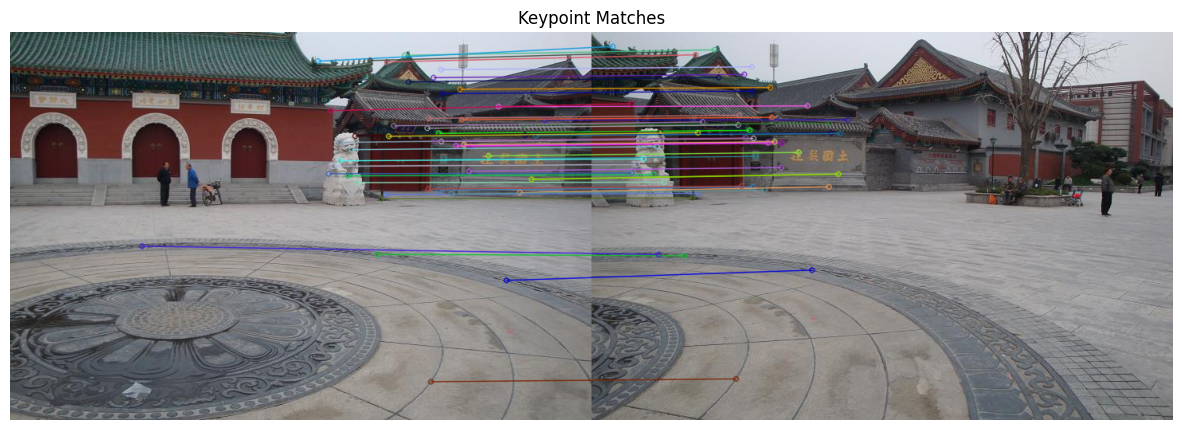

In [9]:
# Initialize the BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_left, descriptors_right)

# Sort matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched images using matplotlib
plt.figure(figsize=(15, 10))
plt.title('Keypoint Matches')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

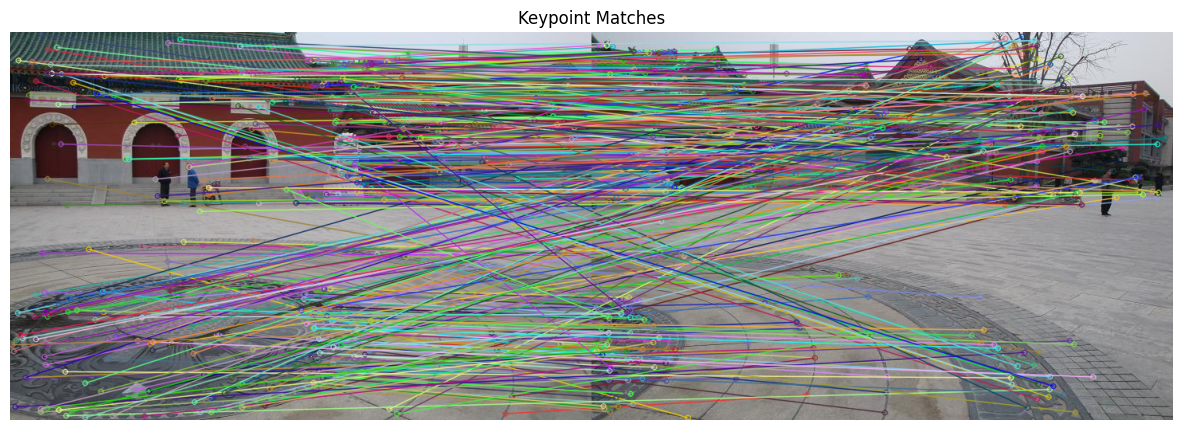

In [53]:
# Draw the matches
matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched images using matplotlib
plt.figure(figsize=(15, 10))
plt.title('Keypoint Matches')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

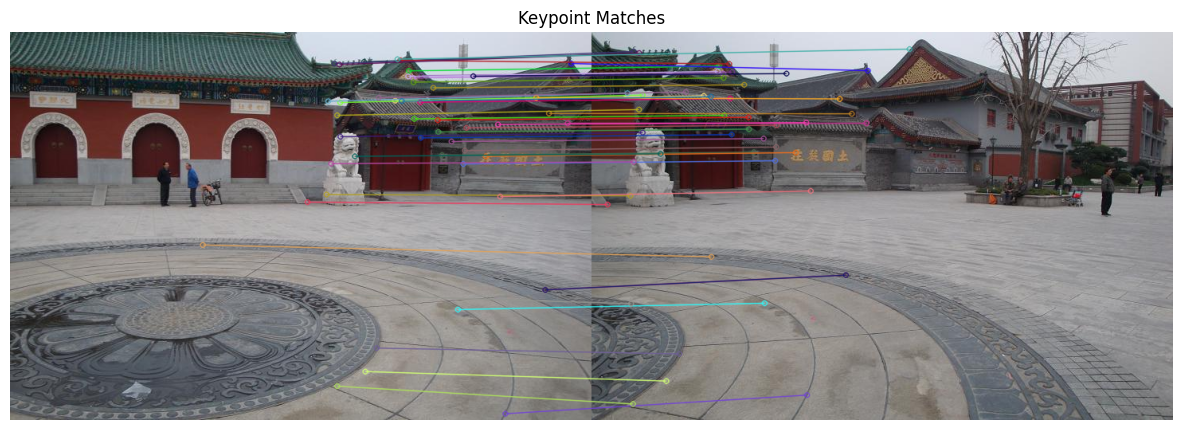

In [55]:
# Draw the matches
matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, matches[50:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched images using matplotlib
plt.figure(figsize=(15, 10))
plt.title('Keypoint Matches')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

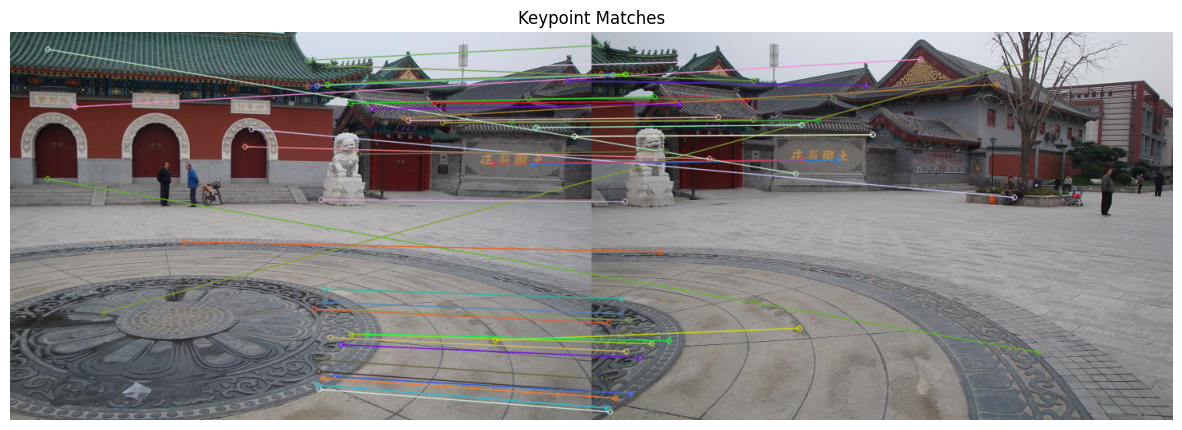

In [56]:
# Draw the matches
matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, matches[200:250], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched images using matplotlib
plt.figure(figsize=(15, 10))
plt.title('Keypoint Matches')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [23]:
type(matches), type(matches[0]), type(matches[0].queryIdx), type(matches[0].trainIdx), type(matches[0].distance)

(list, cv2.DMatch, int, int, float)

In [24]:
print(dir(keypoints_left[0]))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']


In [25]:
[attr for attr in dir(keypoints_left[0]) if not attr.startswith('__') and not attr.endswith('__')]

['angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']

In [26]:
[attr for attr in dir(matches[0]) if not attr.startswith('__') and not attr.endswith('__')]

['distance', 'imgIdx', 'queryIdx', 'trainIdx']

In [27]:
match = matches[0]
print("Distance:", match.distance)
print("Query Index (queryIdx):", match.queryIdx)
print("Train Index (trainIdx):", match.trainIdx)
print("Image Index (imgIdx):", match.imgIdx)
match = matches[1]
print("Distance:", match.distance)
print("Query Index (queryIdx):", match.queryIdx)
print("Train Index (trainIdx):", match.trainIdx)
print("Image Index (imgIdx):", match.imgIdx)

Distance: 32.280025482177734
Query Index (queryIdx): 1824
Train Index (trainIdx): 455
Image Index (imgIdx): 0
Distance: 34.35112762451172
Query Index (queryIdx): 1935
Train Index (trainIdx): 548
Image Index (imgIdx): 0


The queryIdx refers to the index of the keypoint in the query image (left image in your case), and the trainIdx refers to the index of the keypoint in the train image (right image in your case).

### Finalizing Correspondence

In [10]:
correspondences = []
for match in matches:
    correspondences.append((keypoints_left[match.queryIdx].pt, keypoints_right[match.trainIdx].pt))

print(f'Total number of matches: {len(correspondences)}')

Total number of matches: 527


In [34]:
correspondences[:3]

[((538.3804931640625, 198.19094848632812),
  (202.21087646484375, 194.04898071289062)),
 ((612.888427734375, 93.23892974853516),
  (270.7051696777344, 92.30213928222656)),
 ((564.50537109375, 71.44009399414062), (224.0267333984375, 69.2257308959961))]

In [36]:
# Extract correspondences
points_left = np.float32([keypoints_left[m.queryIdx].pt for m in matches])
points_right = np.float32([keypoints_right[m.trainIdx].pt for m in matches])

In [37]:
points_left.shape, points_right.shape

((527, 2), (527, 2))

In [39]:
match_distances = [m.distance for m in matches]
print(f'Minimum distance: {min(match_distances)}')
print(f'Maximum distance: {max(match_distances)}')

Minimum distance: 32.280025482177734
Maximum distance: 392.32000732421875


In [52]:
match_distances = [m.distance for m in matches[:100]]
print(f'Minimum distance: {min(match_distances)}')
print(f'Maximum distance: {max(match_distances)}')

Minimum distance: 32.280025482177734
Maximum distance: 99.25220489501953


In [57]:
# Initialize the BFMatcher withouy cross-checking
bf_ = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# Match descriptors
matches_ = bf_.match(descriptors_left, descriptors_right)

# Print the number of matches
print(f"Number of matches: {len(matches)}")

Number of matches: 527


In [12]:
# in matches, filter any repeating values of queryIdx and trainIdx. keep first occurrence so that least distance one is kept
filtered_matches = []
filtered_matches.append(matches[0])
for match in matches[1:]:
    if match.queryIdx not in [m.queryIdx for m in filtered_matches] and match.trainIdx not in [m.trainIdx for m in filtered_matches]:
        filtered_matches.append(match)
print(f"Number of filtered matches: {len(filtered_matches)}")

Number of filtered matches: 527


In [13]:
nfeatures=100
correspondences = []
for match in filtered_matches[:nfeatures]:
    correspondences.append((keypoints_left[match.queryIdx].pt, keypoints_right[match.trainIdx].pt))
correspondences = np.array(correspondences)
len(correspondences), correspondences[:3]

(100,
 array([[[538.38049316, 198.19094849],
         [202.21087646, 194.04898071]],
 
        [[612.88842773,  93.23892975],
         [270.70516968,  92.30213928]],
 
        [[564.50537109,  71.44009399],
         [224.0267334 ,  69.2257309 ]]]))

## Estimate Homography

In [14]:
def compute_homography(correspondences):
    A = []
    for (x, y), (x_prime, y_prime) in correspondences:
        A.append([-x, -y, -1, 0, 0, 0, x_prime * x, x_prime * y, x_prime])
        A.append([0, 0, 0, -x, -y, -1, y_prime * x, y_prime * y, y_prime])

    A = np.array(A)
    _, _, Vt = np.linalg.svd(A)
    H = Vt[-1].reshape(3, 3)
    return H / H[-1, -1]

In [15]:
def ransac_homography(correspondences, iterations=1000, threshold=5.0):
    max_inliers = []
    best_H = None

    num_points = correspondences.shape[0]

    for _ in range(iterations):
        sample_indices = np.random.choice(num_points, 4, replace=False)
        sample_correspondences = correspondences[sample_indices]

        H = compute_homography(sample_correspondences)

        inliers = []
        for (x, y), (x_prime, y_prime) in correspondences:
            transformed_point = np.dot(H, np.array([x, y, 1]))
            transformed_point /= transformed_point[2]

            distance = np.linalg.norm(transformed_point[:2] - np.array([x_prime, y_prime]))

            if distance < threshold:
                inliers.append(((x, y), (x_prime, y_prime)))

        if len(inliers) > len(max_inliers):
            max_inliers = inliers
            best_H = H

    if best_H is not None:
        best_H = compute_homography(max_inliers)

    return best_H

In [16]:
homography_matrix = ransac_homography(correspondences)
homography_matrix

array([[ 1.77398211e+00, -4.68378490e-03, -6.43580956e+02],
       [ 1.49814557e-01,  1.57080153e+00, -8.76870347e+01],
       [ 1.02951994e-03,  5.54464606e-05,  1.00000000e+00]])

In [17]:
# norm of h_m
np.linalg.norm(homography_matrix)

649.5322165690911

In [69]:
type(homography_matrix)

numpy.ndarray

## Warping

### trial-1

In [30]:
def compute_bounding_box(image, H):
    h, w = image.shape[:2]
    
    corners = np.array([
        [0, 0, 1],       
        [w - 1, 0, 1],   
        [w - 1, h - 1, 1], 
        [0, h - 1, 1]  
    ])

    transformed_corners = []
    for corner in corners:
        transformed_corner = np.dot(H, corner)
        transformed_corner /= transformed_corner[2] 
        transformed_corners.append(transformed_corner[:2])
    
    transformed_corners = np.array(transformed_corners)
    x_min, y_min = np.min(transformed_corners, axis=0)
    x_max, y_max = np.max(transformed_corners, axis=0)

    return int(x_min), int(y_min), int(x_max), int(y_max)

In [31]:
def bilinear_interpolation(image, x, y):
    x1, y1 = int(x), int(y)
    x2, y2 = min(x1 + 1, image.shape[1] - 1), min(y1 + 1, image.shape[0] - 1)

    dx, dy = x - x1, y - y1

    top_left = image[y1, x1]
    top_right = image[y1, x2]
    bottom_left = image[y2, x1]
    bottom_right = image[y2, x2]

    top = (1 - dx) * top_left + dx * top_right
    bottom = (1 - dx) * bottom_left + dx * bottom_right

    interpolated_value = (1 - dy) * top + dy * bottom

    return np.clip(interpolated_value, 0, 255).astype(np.uint8)

In [32]:
def warp_image(image, H):
    x_min, y_min, x_max, y_max = compute_bounding_box(image, H)
    
    h_out, w_out = int(y_max - y_min), int(x_max - x_min)
    
    warped_image = np.zeros((h_out, w_out, 3), dtype=np.uint8)

    H_inv = np.linalg.inv(H)

    for y_out in range(h_out):
        for x_out in range(w_out):
            src_point = np.dot(H_inv, np.array([x_out + x_min, y_out + y_min, 1]))
            src_point /= src_point[2] 

            x_src, y_src = src_point[:2]

            if 0 <= x_src < image.shape[1] and 0 <= y_src < image.shape[0]:
                warped_image[y_out, x_out] = bilinear_interpolation(image, x_src, y_src)

    return warped_image

In [40]:
def stitch_images(base_image, warped_next_image):
    h_base, w_base = base_image.shape[:2]
    h_next, w_next = warped_next_image.shape[:2]

    stitched_canvas = np.zeros((max(h_base, h_next), max(w_base, w_next), 3), dtype=np.uint8)
    stitched_canvas[:h_base, :w_base] = base_image

    for y in range(h_next):
        for x in range(w_next):
            if np.any(warped_next_image[y, x] > 0):
                stitched_canvas[y, x] = warped_next_image[y, x]

    return stitched_canvas

In [33]:
warped_next_image = warp_image(right_image, homography_matrix)

In [85]:
stitched_image = stitch_images(left_image, warped_next_image)

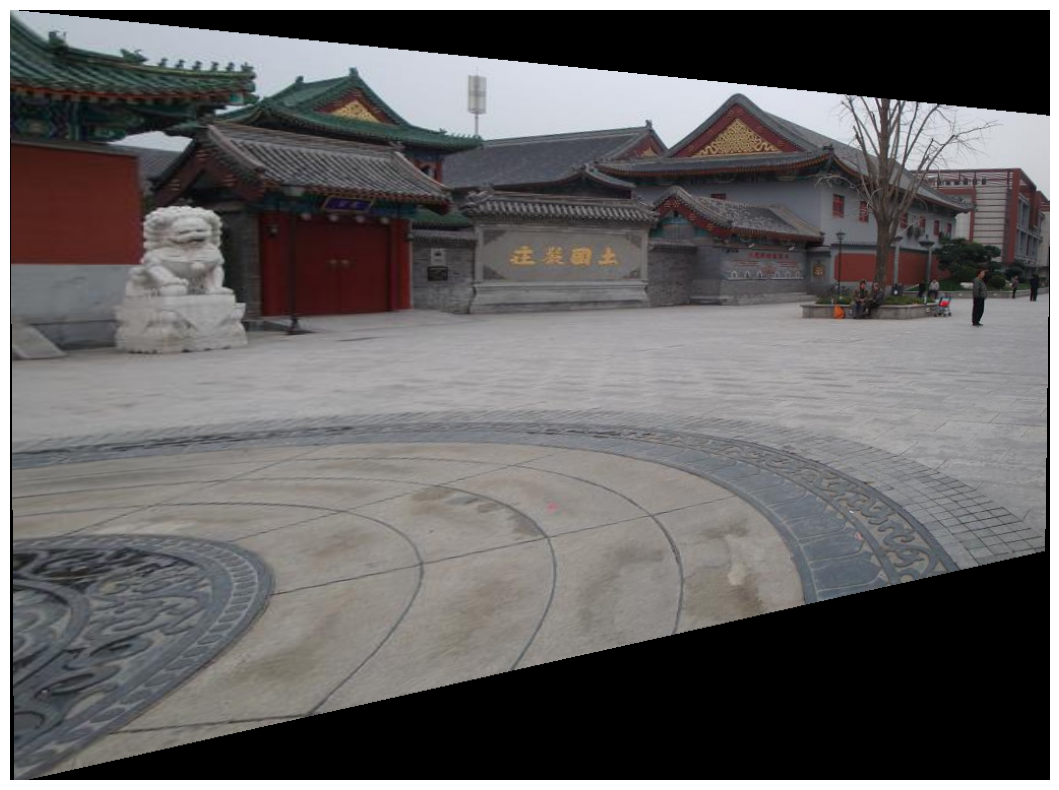

In [86]:
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(warped_next_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

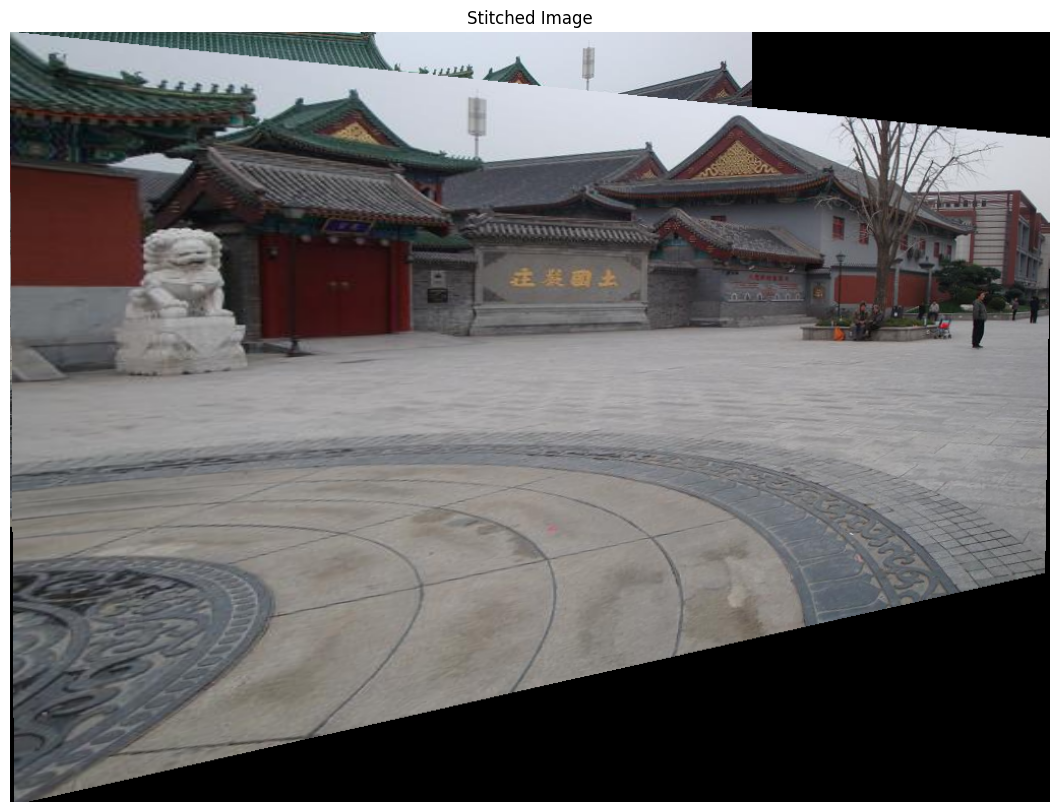

In [87]:
plt.figure(figsize=(15, 10))
plt.title('Stitched Image')
plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Image Stats

In [23]:
def get_image_sizes(directory):
    """
    Get the sizes of all images in each folder within the specified directory.
    
    Args:
    - directory (str): The path to the directory containing the folders (I1 to I6).
    
    Returns:
    - dict: A dictionary where the keys are folder names and the values are lists of image sizes.
    """
    image_sizes = {}

    # Iterate through each folder (I1 to I6)
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        
        if os.path.isdir(folder_path):
            image_sizes[folder_name] = []
            
            # Iterate through each image in the folder
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                
                if os.path.isfile(image_path):
                    # Read the image using OpenCV
                    image = cv2.imread(image_path)
                    
                    if image is not None:
                        # Get the size of the image (height, width, channels)
                        height, width, channels = image.shape
                        image_sizes[folder_name].append((height, width, channels))
                    else:
                        print(f"Warning: Unable to read image {image_path}")
    
    return image_sizes

In [24]:
directory = r'C:\Users\Yashraj Deshmukh\Desktop\Panaroma-Stitching\Images'
image_sizes = get_image_sizes(directory)

# Print the sizes of all images in each folder
for folder, sizes in image_sizes.items():
    print(f"\nFolder: {folder}")
    for size in sizes:
        print(f"  Size: {size}")


Folder: I1
  Size: (2448, 3264, 3)
  Size: (2448, 3264, 3)
  Size: (2448, 3264, 3)
  Size: (2448, 3264, 3)
  Size: (2448, 3264, 3)
  Size: (2448, 3264, 3)

Folder: I2
  Size: (490, 653, 3)
  Size: (490, 653, 3)
  Size: (490, 653, 3)
  Size: (490, 653, 3)
  Size: (490, 653, 3)

Folder: I3
  Size: (487, 730, 3)
  Size: (487, 730, 3)
  Size: (487, 730, 3)
  Size: (487, 730, 3)
  Size: (487, 730, 3)

Folder: I4
  Size: (2658, 4000, 3)
  Size: (1329, 2000, 3)
  Size: (1329, 2000, 3)
  Size: (1329, 2000, 3)
  Size: (1329, 2000, 3)

Folder: I5
  Size: (1329, 2000, 3)
  Size: (1329, 2000, 3)
  Size: (1329, 2000, 3)
  Size: (1329, 2000, 3)
  Size: (1329, 2000, 3)

Folder: I6
  Size: (400, 602, 3)
  Size: (400, 602, 3)
  Size: (400, 602, 3)
  Size: (400, 602, 3)
  Size: (400, 602, 3)


In [25]:
def resize_image(image):
    """
    Resize the image based on its shape.
    
    Args:
    - image (numpy.ndarray): The input image.
    
    Returns:
    - numpy.ndarray: The resized image.
    """
    height, width, channels = image.shape
    
    if (height, width) == (2448, 3264) or (height, width) == (2658, 4000):
        # Reduce the size by a factor of 4
        new_height = height // 4
        new_width = width // 4
    elif (height, width) == (1329, 2000):
        # Reduce the size by half
        new_height = height // 2
        new_width = width // 2
    else:
        # Pass the image as it is
        return image
    
    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    return resized_image

In [26]:
# Example of resizing an image
image_path = r'C:\Users\Yashraj Deshmukh\Desktop\Panaroma-Stitching\Images\I4\DSC02930.jpg'
image = cv2.imread(image_path)
resized_image = resize_image(image)
print(f"Original size: {image.shape}")
print(f"Resized size: {resized_image.shape}")

Original size: (2658, 4000, 3)
Resized size: (664, 1000, 3)


In [27]:
image_path = r'C:\Users\Yashraj Deshmukh\Desktop\Panaroma-Stitching\Images\I5\DSC03002.jpg'
image = cv2.imread(image_path)
resized_image = resize_image(image)
print(f"Original size: {image.shape}")
print(f"Resized size: {resized_image.shape}")

Original size: (1329, 2000, 3)
Resized size: (664, 1000, 3)


In [29]:
image_path = r'C:\Users\Yashraj Deshmukh\Desktop\Panaroma-Stitching\Images\I3\3_1.jpg'
image = cv2.imread(image_path)
resized_image = resize_image(image)
print(f"Original size: {image.shape}")
print(f"Resized size: {resized_image.shape}")

Original size: (487, 730, 3)
Resized size: (487, 730, 3)


## Stitching

### which side to warp

In [34]:
left_image.shape ,warped_next_image.shape

((487, 730, 3), (744, 1014, 3))

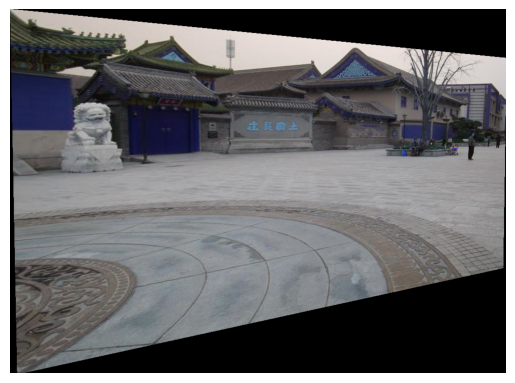

In [38]:
plt.figure()
plt.axis('off')
plt.imshow(warped_next_image)

In [42]:
warped_base_image = warp_image(left_image, homography_matrix)
left_image.shape ,warped_base_image.shape, right_image.shape ,warped_next_image.shape

((487, 730, 3), (744, 1014, 3), (487, 730, 3), (744, 1014, 3))

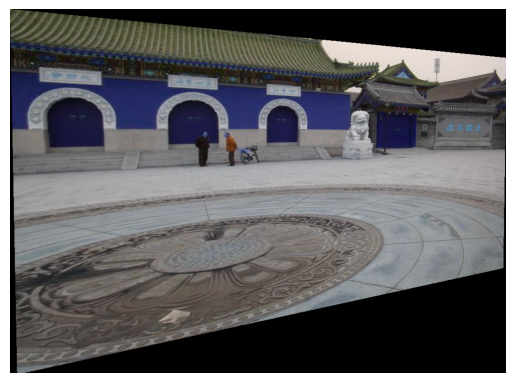

In [43]:
plt.figure()
plt.axis('off')
plt.imshow(warped_base_image)

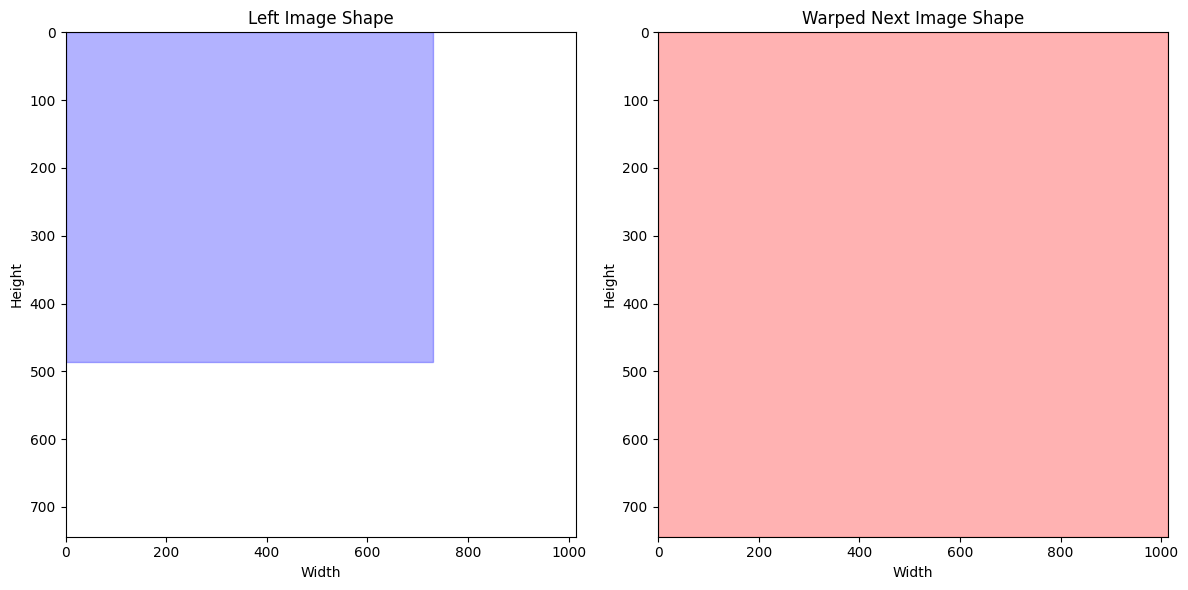

In [35]:
# Get the shapes of the images
h_left, w_left = left_image.shape[:2]
h_warped, w_warped = warped_next_image.shape[:2]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the left image shape
axes[0].add_patch(plt.Rectangle((0, 0), w_left, h_left, edgecolor='blue', facecolor='blue', alpha=0.3))
axes[0].set_xlim(0, max(w_left, w_warped))
axes[0].set_ylim(0, max(h_left, h_warped))
axes[0].invert_yaxis()  # Invert y-axis to match image coordinates
axes[0].set_title('Left Image Shape')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')

# Plot the warped next image shape
axes[1].add_patch(plt.Rectangle((0, 0), w_warped, h_warped, edgecolor='red', facecolor='red', alpha=0.3))
axes[1].set_xlim(0, max(w_left, w_warped))
axes[1].set_ylim(0, max(h_left, h_warped))
axes[1].invert_yaxis()  # Invert y-axis to match image coordinates
axes[1].set_title('Warped Next Image Shape')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Height')

# Show the plots
plt.tight_layout()
plt.show()

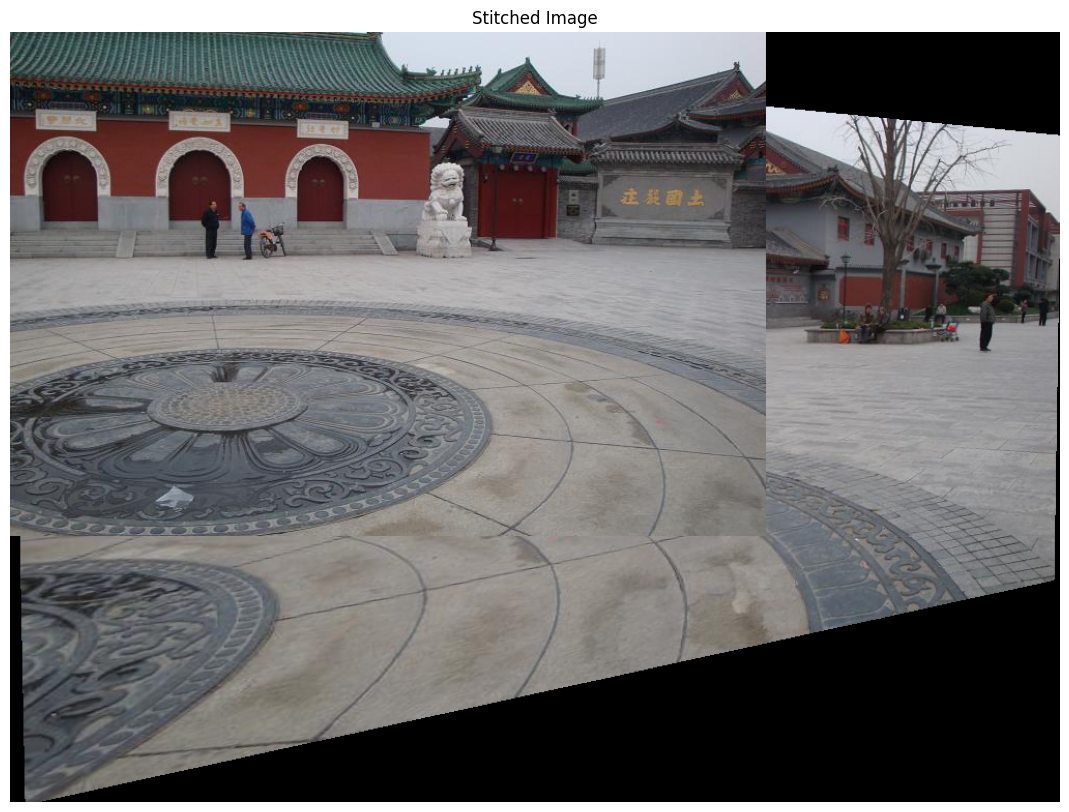

In [41]:
stitched_image = stitch_images(warped_next_image, left_image)
plt.figure(figsize=(15, 10))
plt.title('Stitched Image')
plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

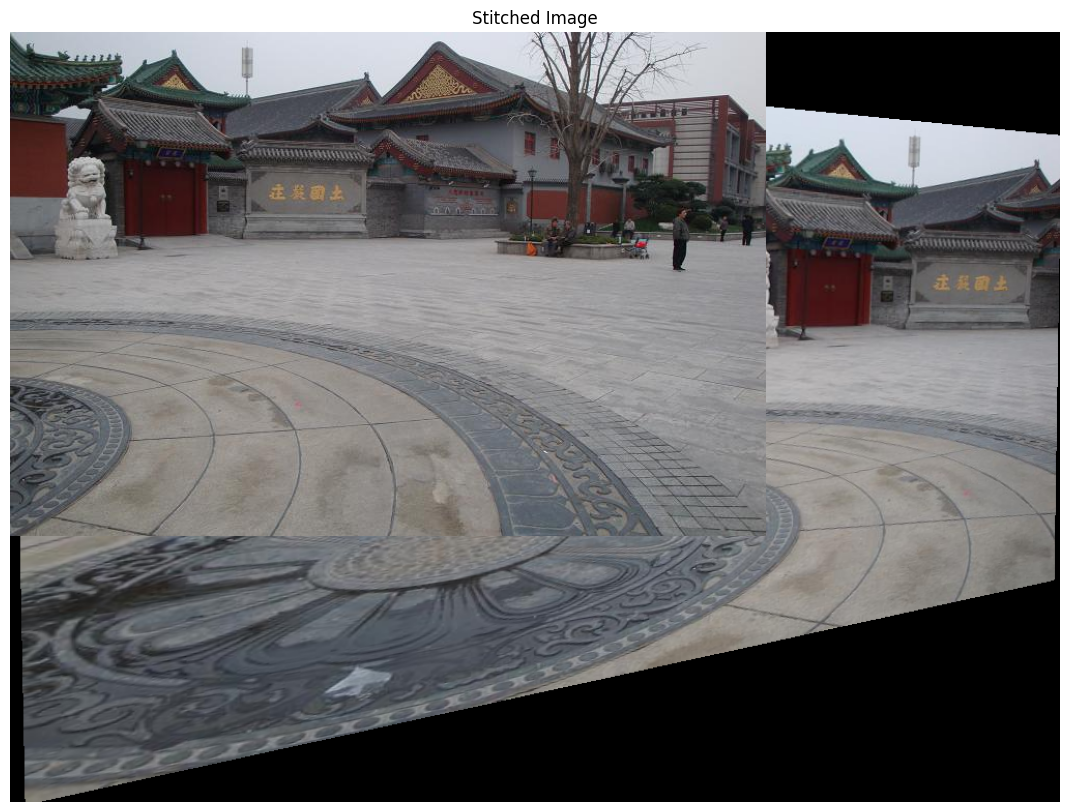

In [44]:
stitched_image = stitch_images(warped_base_image, right_image)
plt.figure(figsize=(15, 10))
plt.title('Stitched Image')
plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### stitch trial

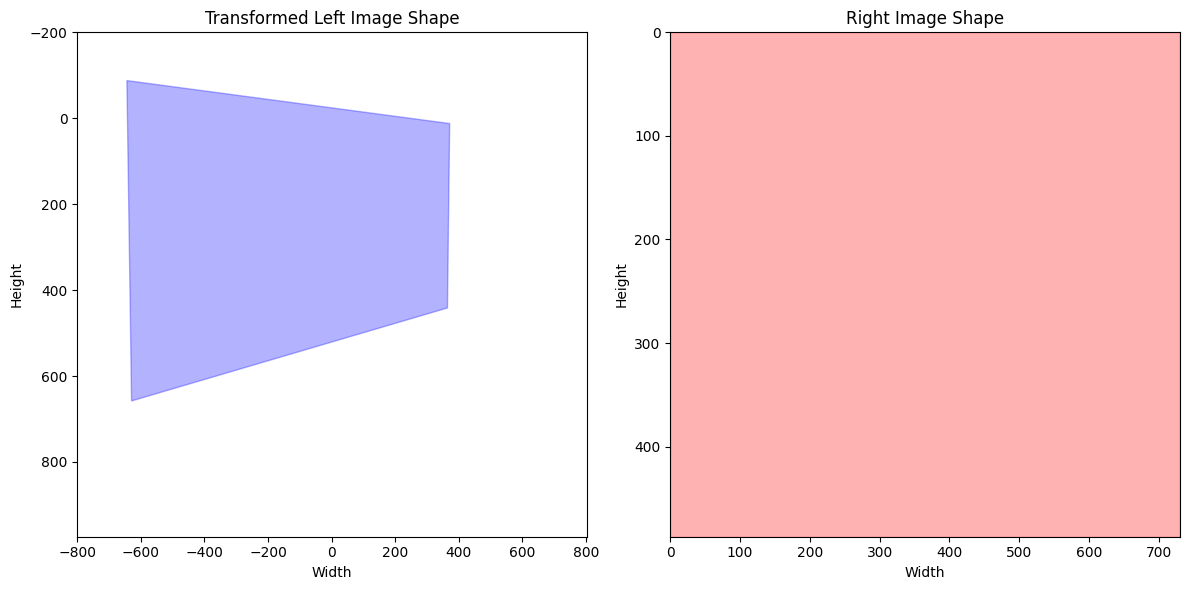

In [55]:
def cbx(image, H):
    h, w = image.shape[:2]
    
    corners = np.array([
        [0, 0, 1],       
        [w - 1, 0, 1],   
        [w - 1, h - 1, 1], 
        [0, h - 1, 1]  
    ])

    transformed_corners = []
    for corner in corners:
        transformed_corner = np.dot(H, corner)
        transformed_corner /= transformed_corner[2] 
        transformed_corners.append(transformed_corner[:2])
    
    return np.array(transformed_corners)

"""
Plot the height and width of left_image and right_image as regions in two different plots side by side.

Args:
- left_image (numpy.ndarray): The left image.
- right_image (numpy.ndarray): The right image.
- H (numpy.ndarray): The homography matrix.
"""
# Get the shapes of the images
h_left, w_left = left_image.shape[:2]
h_right, w_right = right_image.shape[:2]

# Compute the transformed corners of the left image
transformed_corners = cbx(left_image, homography_matrix)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the transformed left image shape
axes[0].add_patch(plt.Polygon(transformed_corners, edgecolor='blue', facecolor='blue', alpha=0.3))
axes[0].set_xlim(-800, 1.1*max(w_left, w_right))
axes[0].set_ylim(-200, 2*max(h_left, h_right))
axes[0].invert_yaxis()  # Invert y-axis to match image coordinates
axes[0].set_title('Transformed Left Image Shape')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')

# Plot the right image shape
axes[1].add_patch(plt.Rectangle((0, 0), w_right, h_right, edgecolor='red', facecolor='red', alpha=0.3))
axes[1].set_xlim(0, max(w_left, w_right))
axes[1].set_ylim(0, max(h_left, h_right))
axes[1].invert_yaxis()  # Invert y-axis to match image coordinates
axes[1].set_title('Right Image Shape')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Height')

# Show the plots
plt.tight_layout()
plt.show()

In [56]:
def overlay_images(left_image, right_image, H):
    """
    Overlay the transformed left image on top of the right image.
    
    Args:
    - left_image (numpy.ndarray): The left image.
    - right_image (numpy.ndarray): The right image.
    - H (numpy.ndarray): The homography matrix.
    """
    # Get the shapes of the images
    h_left, w_left = left_image.shape[:2]
    h_right, w_right = right_image.shape[:2]

    # Compute the transformed corners of the left image
    transformed_corners = cbx(left_image, H)

    # Create a figure with one subplot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the right image shape
    ax.add_patch(plt.Rectangle((0, 0), w_right, h_right, edgecolor='red', facecolor='red', alpha=0.3))
    
    # Plot the transformed left image shape
    ax.add_patch(plt.Polygon(transformed_corners, edgecolor='blue', facecolor='blue', alpha=0.3))

    # Set limits to accommodate both images
    ax.set_xlim(-800, 1.1 * max(w_left, w_right))
    ax.set_ylim(-200, 2 * max(h_left, h_right))
    ax.invert_yaxis()  # Invert y-axis to match image coordinates
    ax.set_title('Overlay of Transformed Left Image on Right Image')
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')

    # Show the plot
    plt.tight_layout()
    plt.show()

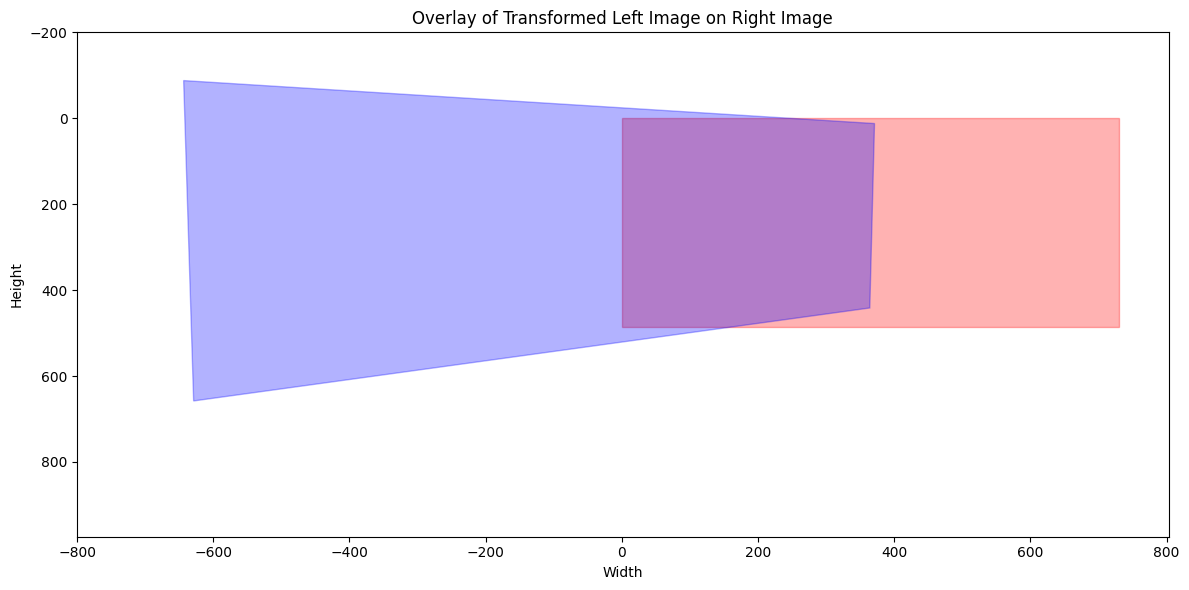

In [57]:
overlay_images(left_image, right_image, homography_matrix)

In [59]:
x_min = -2; x_max = 2; y_min = -1; y_max = 1

x_coords, y_coords = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
coords_homogeneous = np.stack([x_coords.flatten(), y_coords.flatten(), np.ones_like(x_coords.flatten())])

In [60]:
print(x_coords)
print(y_coords)
print(coords_homogeneous)

[[-2 -1  0  1]
 [-2 -1  0  1]]
[[-1 -1 -1 -1]
 [ 0  0  0  0]]
[[-2 -1  0  1 -2 -1  0  1]
 [-1 -1 -1 -1  0  0  0  0]
 [ 1  1  1  1  1  1  1  1]]


In [62]:
H_inv = np.linalg.inv(homography_matrix)
transformed_coords = H_inv @ coords_homogeneous
transformed_coords /= transformed_coords[2]
print(transformed_coords)

[[361.29492764 362.0683044  362.84257394 363.61773781 361.29717779
  362.07058446 362.84488398 363.6200779 ]
 [ 20.490621    20.41635625  20.34200577  20.26756941  21.36454386
   21.29078051  21.21693201  21.14299821]
 [  1.           1.           1.           1.           1.
    1.           1.           1.        ]]
